**Clustering in Customer Personality Analysis**

In this notebook, I will use clustering algorithms for the task of Customer Personality Analysis.

Customer Personality Analysis is the examination of different segments of a company's customers. This analysis allows businesses to better understand their clients and facilitates the adaptation of products to the specific needs, behaviors, and interests of different types of customers.

Customer portrait analysis helps businesses modify their products based on the target audience segmented into various groups. For example, instead of spending money on marketing a new product to all customers in the company's database, a business can analyze which customer segment is most likely to purchase the product and then focus marketing efforts solely on that segment.

So, using the provided data in the file marketing_campaign.csv, I'll perform clustering to identify customer segments.

Input Data
I'm provided with a dataset containing the following attributes:

User Characteristics:

ID: Unique identifier for the customer;
Year_Birth: Year of birth of the customer;
Education: Education level of the customer;
Marital_Status: Marital status of the customer;
Income: Annual household income of the customer;
Kidhome: Number of children in the customer's household;
Teenhome: Number of teenagers in the customer's household;
Dt_Customer: Registration date of the customer with the company;
Recency: Number of days since the customer's last purchase;
Complain: 1 if the customer complained in the last 2 years, 0 if not.

Products:

MntWines: Amount spent on wine in the last 2 years;
MntFruits: Amount spent on fruits in the last 2 years;
MntMeatProducts: Amount spent on meat products in the last 2 years;
MntFishProducts: Amount spent on fish products in the last 2 years;
MntSweetProducts: Amount spent on sweets in the last 2 years;
MntGoldProds: Amount spent on gold in the last 2 years.

Promotions:

NumDealsPurchases: Number of purchases made using discounts;
AcceptedCmp1: 1 if the customer accepted the offer in the first campaign, 0 if not;
AcceptedCmp2: 1 if the customer accepted the offer in the second campaign, 0 if not;
AcceptedCmp3: 1 if the customer accepted the offer in the third campaign, 0 if not;
AcceptedCmp4: 1 if the customer accepted the offer in the fourth campaign, 0 if not;
AcceptedCmp5: 1 if the customer accepted the offer in the fifth campaign, 0 if not;
Response: 1 if the customer accepted the offer in the last campaign, 0 if not.

Company Interaction:

NumWebPurchases: Number of purchases made through the company's website;
NumCatalogPurchases: Number of purchases made via catalog;
NumStorePurchases: Number of purchases made directly in stores;
NumWebVisitsMonth: Number of visits to the company's website in the last month.


**Load Data and Display Basic Information**
To complete this task, I'll need to load the data from the marketing_campaign.csv file into a Pandas DataFrame and then display the basic information about the data, including the number of rows and columns, the data types of the columns, and the number of missing values.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
train_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/marketing_campaign.csv')

In [4]:
# Display basic information about the data
print("Number of rows and columns:", train_df.shape)
print("\nData types of each column:\n", train_df.dtypes)
print("\nNumber of missing values in each column:\n", train_df.isnull().sum())

Number of rows and columns: (2240, 29)

Data types of each column:
 ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

Number of missing 

In [5]:
train_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04/09/2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08/03/2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21/08/2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10/02/2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19/01/2014,94,173,...,5,0,0,0,0,0,0,3,11,0


Now I will fill in the missing values considering the task (clustering).

In [6]:
# Filling missing values with the median
median_income = train_df['Income'].median()
train_df['Income'].fillna(median_income, inplace=True)

# Checking the results
print("Number of missing values in the 'Income' column after filling:", train_df['Income'].isnull().sum())

Number of missing values in the 'Income' column after filling: 0


<ipython-input-6-d2b2b0e7541b>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Income'].fillna(median_income, inplace=True)


Filling missing values with the median is better for cases with a skewed distribution of income or the presence of outliers, which is often encountered in marketing data.

Now I have several columns with categorical values and one column with dates. I'll implement the processing of the categorical columns and the date column and transform them into features.

In [7]:
from sklearn.preprocessing import LabelEncoder

# Label Encoding for categorical columns
le = LabelEncoder()
train_df['Education'] = le.fit_transform(train_df['Education'])
train_df['Marital_Status'] = le.fit_transform(train_df['Marital_Status'])

In [8]:
# Convert the 'Dt_Customer' column to datetime format, considering the date format
train_df['Dt_Customer'] = pd.to_datetime(train_df['Dt_Customer'], dayfirst=True, errors='coerce')

# Check if the conversion was successful
print(train_df['Dt_Customer'].head())

# Add a new feature - Year of Joining
train_df['Year_Customer'] = train_df['Dt_Customer'].dt.year

# Add a new feature - Number of days since joining
current_date = pd.to_datetime('today')
train_df['Days_Customer'] = (current_date - train_df['Dt_Customer']).dt.days

# Remove the original date column
train_df.drop(columns=['Dt_Customer'], inplace=True)

0   2012-09-04
1   2014-03-08
2   2013-08-21
3   2014-02-10
4   2014-01-19
Name: Dt_Customer, dtype: datetime64[ns]


In [9]:
train_df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Year_Customer,Days_Customer
0,5524,1957,2,4,58138.0,0,0,58,635,88,...,0,0,0,0,0,3,11,1,2012,4416
1,2174,1954,2,4,46344.0,1,1,38,11,1,...,0,0,0,0,0,3,11,0,2014,3866
2,4141,1965,2,5,71613.0,0,0,26,426,49,...,0,0,0,0,0,3,11,0,2013,4065
3,6182,1984,2,5,26646.0,1,0,26,11,4,...,0,0,0,0,0,3,11,0,2014,3892
4,5324,1981,4,3,58293.0,1,0,94,173,43,...,0,0,0,0,0,3,11,0,2014,3914


Now I will store the data that will cluster in the variable X.
Then perform clustering using KMeans with 3 clusters and calculate the silhouette score for this clustering.

In [10]:
# Save the data for clustering in the variable X (all numerical columns)
X = train_df.copy()

# Check the prepared data
print(X.head())

     ID  Year_Birth  Education  Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957          2               4  58138.0        0         0   
1  2174        1954          2               4  46344.0        1         1   
2  4141        1965          2               5  71613.0        0         0   
3  6182        1984          2               5  26646.0        1         0   
4  5324        1981          4               3  58293.0        1         0   

   Recency  MntWines  MntFruits  ...  AcceptedCmp4  AcceptedCmp5  \
0       58       635         88  ...             0             0   
1       38        11          1  ...             0             0   
2       26       426         49  ...             0             0   
3       26        11          4  ...             0             0   
4       94       173         43  ...             0             0   

   AcceptedCmp1  AcceptedCmp2  Complain  Z_CostContact  Z_Revenue  Response  \
0             0             0         0    

In [11]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Standardizing the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Creating a KMeans model with 3 clusters
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_scaled)

# Getting cluster labels
labels = kmeans.labels_

# Adding cluster labels to the DataFrame (optional)
train_df['Cluster'] = labels

In [12]:
from sklearn.metrics import silhouette_score

# Calculating the silhouette score
silhouette_avg = silhouette_score(X_scaled, labels)

print(f"Average silhouette score for clustering: {silhouette_avg:.4f}")

Average silhouette score for clustering: 0.1441


Now I will visualize the found clusters along with the existing data and analyze the clusters. Since I have more than 2 or 3 features, I need to think about which features to use for visualization to make them informative.

In [13]:
import plotly.express as px

# Creating a 3D scatter plot
fig = px.scatter_3d(train_df,
                    x='Income',
                    y='NumStorePurchases',
                    z='NumWebPurchases',
                    color='Cluster',  # Display clusters by color
                    symbol='Cluster',  # Additionally, use different symbols for clusters
                    title='3D Cluster Visualization',
                    labels={'Income': 'Income', 'NumStorePurchases': 'Store Purchases', 'NumWebPurchases': 'Online Purchases'}
                   )

# Displaying the plot
fig.show()

Next task to scale the data again and perform KMeans clustering with 3 clusters. After that, I will compute the silhouette score and compare it to the previous experiment without scaling the values.

In [14]:
from sklearn.preprocessing import StandardScaler

# Scaling the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [15]:
from sklearn.cluster import KMeans

# Creating a KMeans model with 3 clusters
kmeans_scaled = KMeans(n_clusters=3, random_state=42)
kmeans_scaled.fit(X_scaled)

# Getting cluster labels
labels_scaled = kmeans_scaled.labels_

In [16]:
from sklearn.metrics import silhouette_score

# Calculating silhouette score for scaled data
silhouette_avg_scaled = silhouette_score(X_scaled, labels_scaled)

print(f"Average silhouette score for clustering with scaling: {silhouette_avg_scaled:.4f}")

Average silhouette score for clustering with scaling: 0.1441


The average silhouette score for clustering with and without scaling is 0.1441, which in this case indicates that scaling does not provide an improvement.

In the previous visualizations, I had identified some outliers in the data. In this task, I will process these outliers.

In [17]:
import numpy as np

# Function to detect outliers using the Interquartile Range (IQR)
def detect_outliers_iqr(data):
    Q1 = np.percentile(data, 25)  # First quartile (25th percentile)
    Q3 = np.percentile(data, 75)   # Third quartile (75th percentile)
    IQR = Q3 - Q1                  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR   # Lower bound for outliers
    upper_bound = Q3 + 1.5 * IQR   # Upper bound for outliers
    return data[(data < lower_bound) | (data > upper_bound)]

# Detecting outliers in several important columns
income_outliers = detect_outliers_iqr(train_df['Income'])
store_purchases_outliers = detect_outliers_iqr(train_df['NumStorePurchases'])
web_purchases_outliers = detect_outliers_iqr(train_df['NumWebPurchases'])

# Combining the indices of rows with outliers
outlier_indices = set(income_outliers.index).union(store_purchases_outliers.index).union(web_purchases_outliers.index)

# Removing rows with outliers
train_df_cleaned = train_df.drop(index=outlier_indices)

print(f"Number of rows after removing outliers: {train_df_cleaned.shape[0]}")

Number of rows after removing outliers: 2228


In [18]:
# Scaling the updated data
X_cleaned = train_df_cleaned.drop(columns=['Cluster'])  # Remove the column with previous clusters
X_cleaned_scaled = scaler.fit_transform(X_cleaned)

# Clustering after removing outliers
kmeans_cleaned = KMeans(n_clusters=3, random_state=42)
kmeans_cleaned.fit(X_cleaned_scaled)

# Obtaining cluster labels
labels_cleaned = kmeans_cleaned.labels_

# Calculating silhouette score after removing outliers
silhouette_avg_cleaned = silhouette_score(X_cleaned_scaled, labels_cleaned)

print(f"Average silhouette score after removing outliers: {silhouette_avg_cleaned:.4f}")

Average silhouette score after removing outliers: 0.1813


The average silhouette score after removing outliers has slightly increased compared to before the removal. This may indicate some improvements, but the difference is quite insignificant.

Now I will perform the Elbow method to find the optimal number of clusters and train KMeans with the number of clusters that the Elbow method indicates as optimal. Then calculate the silhouette score and visualize the clusters.

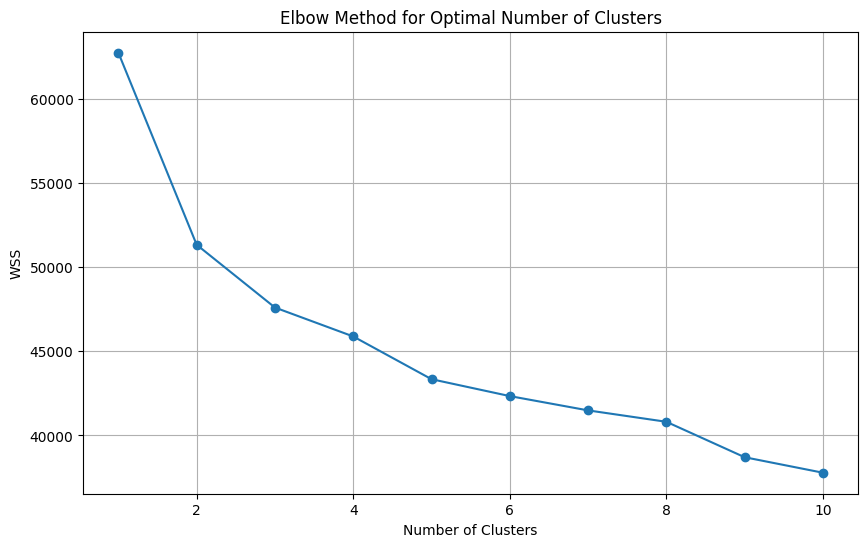

In [19]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# Function to perform the Elbow Method
def elbow_method(X):
    wss = []
    k_range = range(1, 11)  # From 1 to 10 clusters
    for k in k_range:
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(X)
        wss.append(kmeans.inertia_)

    plt.figure(figsize=(10, 6))
    plt.plot(k_range, wss, marker='o')
    plt.xlabel('Number of Clusters')
    plt.ylabel('WSS')
    plt.title('Elbow Method for Optimal Number of Clusters')
    plt.grid(True)
    plt.show()

# Execute the Elbow Method on scaled data
elbow_method(X_scaled)

In [20]:
optimal_clusters = 3

# Clustering with KMeans
kmeans_optimal = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_optimal.fit(X_scaled)

# Obtaining cluster labels
labels_optimal_scaled = kmeans_optimal.labels_

# Calculating the silhouette score
silhouette_avg_optimal_scaled = silhouette_score(X_scaled, labels_optimal_scaled)

print(f"Average silhouette score for scaled data with {optimal_clusters} clusters: {silhouette_avg_optimal_scaled:.4f}")

Average silhouette score for scaled data with 3 clusters: 0.1441


In [21]:
# Clustering with KMeans for unscaled data
kmeans_optimal_raw = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_optimal_raw.fit(X)

# Obtaining cluster labels
labels_optimal_raw = kmeans_optimal_raw.labels_

# Calculating the silhouette score for unscaled data
silhouette_avg_optimal_raw = silhouette_score(X, labels_optimal_raw)

print(f"Average silhouette score for unscaled data with {optimal_clusters} clusters: {silhouette_avg_optimal_raw:.4f}")


Average silhouette score for unscaled data with 3 clusters: 0.4886


In [22]:
import plotly.express as px

# Adding cluster labels to the DataFrame
train_df['Cluster'] = labels_optimal_scaled

# Visualizing the 3D scatter plot
fig_scaled = px.scatter_3d(train_df,
                          x='Income',
                          y='NumStorePurchases',
                          z='NumWebPurchases',
                          color='Cluster',
                          title='3D Visualization of Clusters (Scaled Data)',
                          labels={'Income':'Income', 'NumStorePurchases':'Store Purchases', 'NumWebPurchases':'Online Purchases'}
                         )

fig_scaled.show()


In [23]:
# Adding cluster labels to the DataFrame
train_df['Cluster'] = labels_optimal_raw

# Visualizing the 3D scatter plot
fig_raw = px.scatter_3d(train_df,
                       x='Income',
                       y='NumStorePurchases',
                       z='NumWebPurchases',
                       color='Cluster',
                       title='3D Visualization of Clusters (Unscaled Data)',
                       labels={'Income':'Income', 'NumStorePurchases':'Store Purchases', 'NumWebPurchases':'Online Purchases'}
                      )

fig_raw.show()


Now using the scipy methods dendrogram, linkage, and fcluster I will:

1. Build hierarchical agglomerative clustering with single linkage on the unscaled data, but with outliers removed.
2. Visualize the dendrogram. When visualizing, be sure to set the parameter truncate_mode='lastp' - this will truncate the dendrogram; without this, it will be too large since we have significantly more data than in the lecture.
3. Analyze the dendrogram and create flat cluster options with fcluster for 2 and 3 clusters.
4. Visualize the results of each of these clusterings and draw conclusions.
5. Calculate the silhouette metric for this clustering method.

In [24]:
import pandas as pd
import numpy as np

# Assume train_df_cleaned is the data without outliers
X_cleaned = train_df_cleaned.drop(columns=['Cluster'])  # Remove the column with previous clusters

# Select only numerical features for clustering
X_cleaned = X_cleaned.select_dtypes(include=[np.number])

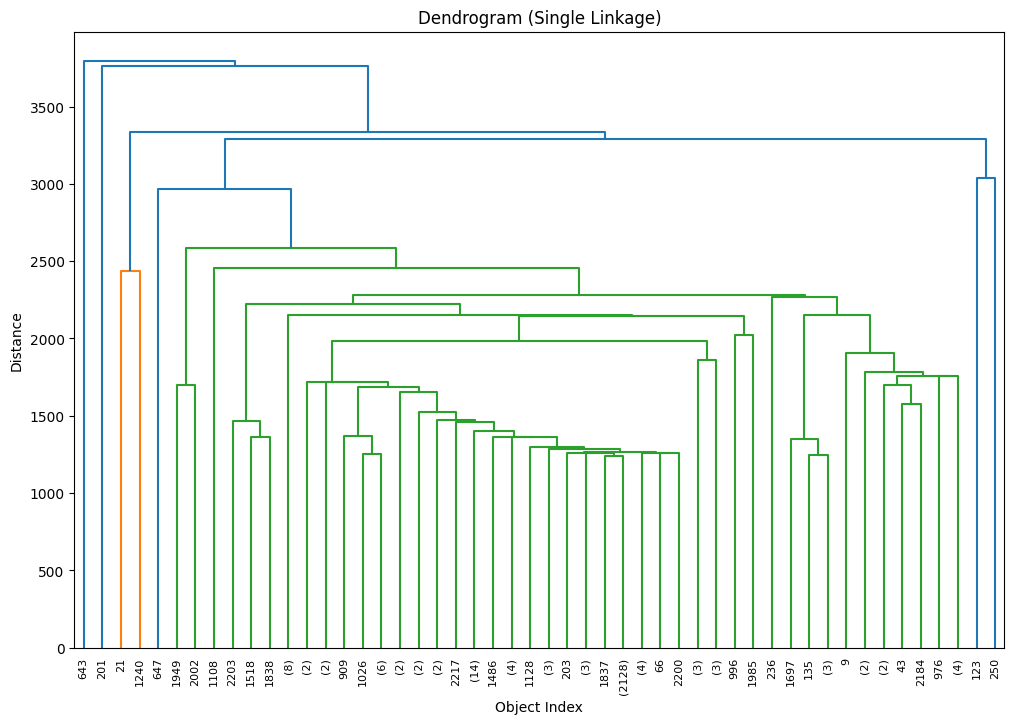

In [25]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Compute the distance matrix and create clustering
linkage_matrix = sch.linkage(X_cleaned, method='single')

# Visualize the dendrogram
plt.figure(figsize=(12, 8))
sch.dendrogram(linkage_matrix, truncate_mode='lastp', p=50)
plt.title('Dendrogram (Single Linkage)')
plt.xlabel('Object Index')
plt.ylabel('Distance')
plt.show()

In [26]:
from scipy.cluster.hierarchy import fcluster

# Clustering into 2 clusters
clusters_2 = fcluster(linkage_matrix, t=2, criterion='maxclust')

# Clustering into 3 clusters
clusters_3 = fcluster(linkage_matrix, t=3, criterion='maxclust')

# Adding cluster labels to the DataFrame
train_df_cleaned['Cluster_2'] = clusters_2
train_df_cleaned['Cluster_3'] = clusters_3

In [27]:
from scipy.cluster.hierarchy import fcluster

# Clustering into 2 clusters
clusters_2 = fcluster(linkage_matrix, t=2, criterion='maxclust')

# Clustering into 3 clusters
clusters_3 = fcluster(linkage_matrix, t=3, criterion='maxclust')

# Adding cluster labels to the DataFrame
train_df_cleaned['Cluster_2'] = clusters_2
train_df_cleaned['Cluster_3'] = clusters_3


In [28]:
import plotly.express as px

# Visualization for 2 clusters
fig_2 = px.scatter_3d(train_df_cleaned,
                      x='Income',
                      y='NumStorePurchases',
                      z='NumWebPurchases',
                      color='Cluster_2',
                      title='3D Visualization of Clusters (2 Clusters)',
                      labels={'Income': 'Income',
                              'NumStorePurchases': 'Store Purchases',
                              'NumWebPurchases': 'Online Purchases'}
                     )
fig_2.show()

# Visualization for 3 clusters
fig_3 = px.scatter_3d(train_df_cleaned,
                      x='Income',
                      y='NumStorePurchases',
                      z='NumWebVisitsMonth',  # Replace with a meaningful feature
                      color='Cluster_3',
                      title='3D Visualization of Clusters (3 Clusters)',
                      labels={'Income': 'Income',
                              'NumStorePurchases': 'Store Purchases',
                              'NumWebVisitsMonth': 'Website Visits'}
                     )
fig_3.show()


In [29]:
from sklearn.metrics import silhouette_score

# Calculate the silhouette score for clustering with 2 clusters
silhouette_avg_2 = silhouette_score(X_cleaned, clusters_2)
print(f"Average silhouette score for 2 clusters: {silhouette_avg_2:.4f}")

# Calculate the silhouette score for clustering with 3 clusters
silhouette_avg_3 = silhouette_score(X_cleaned, clusters_3)
print(f"Average silhouette score for 3 clusters: {silhouette_avg_3:.4f}")


Average silhouette score for 2 clusters: 0.4628
Average silhouette score for 3 clusters: 0.4250


Thus, the silhouette score of 0.4628 is higher than 0.4250 for 3 clusters. This indicates that, in terms of clustering quality, two groups provide a better result compared to three groups.

Now I will use a clustering method that I have not utilized in the previous assignments of this task.
Then will calculate the silhouette score and visualize the results of the clustering, and draw a conclusion about whether this clustering could be useful.

In [32]:
from sklearn.cluster import AgglomerativeClustering

# Perform agglomerative clustering
agg_clustering = AgglomerativeClustering(n_clusters=3)
clusters_agg = agg_clustering.fit_predict(X_cleaned)

# Now you can use clusters_agg
train_df_cleaned['Cluster_Agglomerative'] = clusters_agg

In [33]:
print(train_df_cleaned.columns)

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Year_Customer',
       'Days_Customer', 'Cluster', 'Cluster_2', 'Cluster_3',
       'Cluster_Agglomerative'],
      dtype='object')


In [34]:
from sklearn.cluster import AgglomerativeClustering

# Setting up Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=3, linkage='ward')
clusters_agg = agg_clustering.fit_predict(X_cleaned)

# Calculating the silhouette score
silhouette_avg_agg = silhouette_score(X_cleaned, clusters_agg)
print(f"Average silhouette score for Agglomerative Clustering: {silhouette_avg_agg:.4f}")

# Visualizing the results
fig_agg = px.scatter_3d(train_df_cleaned,
                       x='Income',
                       y='NumStorePurchases',
                       z='NumWebPurchases',
                       color='Cluster_Agglomerative',
                       title='3D Visualization of Clusters (Agglomerative Clustering)',
                       labels={'Income': 'Income', 'NumStorePurchases': 'Store Purchases', 'NumWebPurchases': 'Online Purchases'}
                      )
fig_agg.show()

Average silhouette score for Agglomerative Clustering: 0.4613


The average silhouette score of 0.4613 for Agglomerative Clustering is significantly better than the others. This indicates that Agglomerative Clustering provides a better cluster structure and divides the data into clearer and more homogeneous groups. The results of the clustering are quite distinct and separated. The clusters have a significantly better structure compared to KMeans after removing outliers, where the silhouette score was only 0.1497. However, it is slightly weaker than the result of the agglomerative clustering, which was 0.4625.